In [1]:
from descartes import PolygonPatch 

from pcpptc import PolygonInstance
from pcpptc.grid_solver.grid_solution.coverage_analysis import (
    compute_coverage_polygon_of_grid,
)
from pcpptc.instance_converter import RotatingRegularSquare, RotatingRegularHexagonal
from pcpptc.instance_converter.dmsh import DmshGrid
import numpy as np
from pcpptc.plot import setup_plot, plot_polygon_instance
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

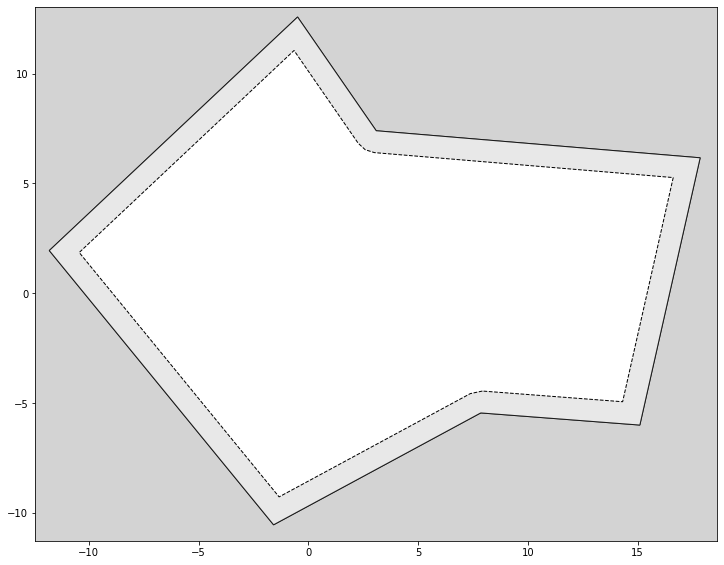

In [2]:
from pcpptc.plot.intermediate import plot_graph, plot_points

pi = PolygonInstance.from_json(file_path="./01c_instance.json")
ax = setup_plot()
plot_polygon_instance(ax, pi, plot_valuable_areas=False)
plt.show()
pi.expensive_areas = []

In [3]:
figsize = (3.5, 3.5)

In [4]:
t = DmshGrid(full_coverage=True, point_based=True, buffer=0.1, simplification=0.1)
gi3 = t(pi)

Optimize grid with CVT-full


<Figure size 432x288 with 0 Axes>

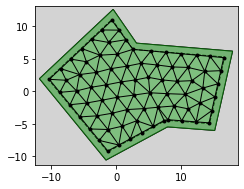

In [5]:
ax = setup_plot(figsize=figsize)
# ax = setup_plot()
plot_polygon_instance(ax, pi)
plot_graph(ax, gi3.graph, marker=".", vertex_color="black", edge_color="black")
plt.tight_layout()
plt.savefig("03a_instance.pdf")
plt.show()

<Figure size 432x288 with 0 Axes>

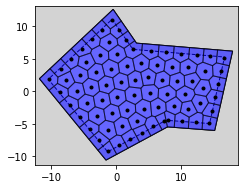

In [9]:
from geovoronoi.plotting import plot_voronoi_polys
from geovoronoi import voronoi_regions_from_coords

points = list(gi3.graph.nodes)
array = np.array([[p.x, p.y] for p in points])

region_polys, region_pts = voronoi_regions_from_coords(array, pi.original_area)
ax = setup_plot(figsize=figsize)
pi.valuable_areas = []
plot_polygon_instance(ax, pi, plot_valuable_areas=False)
plot_voronoi_polys(
    ax, region_polys, edgecolor="black", zorder=2, color="blue", alpha=0.6
)
plot_points(ax, gi3.graph.nodes, marker=".", color="black")
plt.tight_layout()
plt.savefig("03b_voronoi.pdf")
plt.show()

<Figure size 432x288 with 0 Axes>

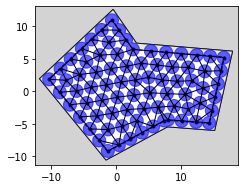

In [10]:
ax = setup_plot(figsize=figsize)
pi.valuable_areas = []
plot_polygon_instance(ax, pi, plot_valuable_areas=False)
covered_area = compute_coverage_polygon_of_grid(gi3.graph.nodes, pi.tool_radius)
plot_graph(ax, gi3.graph, marker=".", vertex_color="black", edge_color="black")
patch1 = PolygonPatch(covered_area, fc="blue", ec="blue", alpha=0.6, zorder=2)  # This requires an older version of Shapely for plotting!
ax.add_patch(patch1)
plt.tight_layout()
plt.savefig("03c_circles.pdf")
plt.show()